In [5]:
import glob, os, sys, shutil
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

%load_ext autoreload
%autoreload 2
%matplotlib inline
if os.name == 'posix':
    %config InlineBackend.figure_format = 'retina' #retina display settings

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


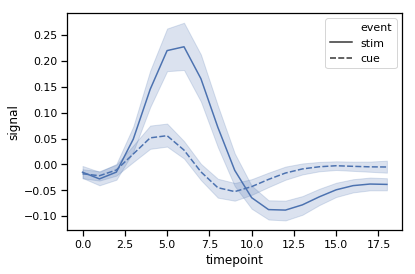

In [6]:
"""
Timeseries plot with error bands
================================

_thumb: .48, .45

"""
import seaborn as sns
sns.set(style=None)

# Load an example dataset with long-form data
fmri = sns.load_dataset("fmri")

# Plot the responses for different events and regions
sns.lineplot(x="timepoint", y="signal", style="event",
             data=fmri, n_boot=10000)


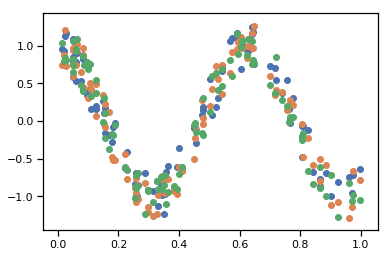

In [7]:
xx = np.random.random(100)
yy1 = np.cos(xx*10) + np.random.uniform(-0.3, 0.3, size=(100))
yy2 = np.cos(xx*10) + np.random.uniform(-0.3, 0.3, size=(100))
yy3 = np.cos(xx*10) + np.random.uniform(-0.3, 0.3, size=(100))



plt.scatter(xx, yy1)
plt.scatter(xx, yy2)
plt.scatter(xx, yy3)

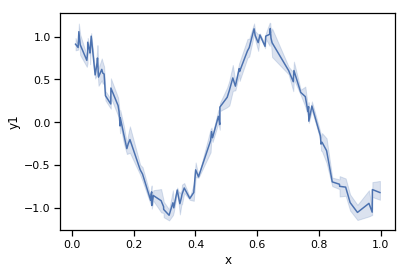

In [8]:
f1 = pd.DataFrame({'x': xx, 'y1':yy1})
f2 = pd.DataFrame({'x': xx, 'y1':yy2})
f3 = pd.DataFrame({'x': xx, 'y1':yy3})


ff = f1.merge(f2, 'outer').merge(f3, 'outer')
# ff = ff.rolling(window=4).mean().dropna()

# sns.lineplot(x=xx, y=yy1+yy2+yy3, n_boot=100, ci='sd')
sns.lineplot(x='x', y='y1', data=ff, markers=['o'], ci=66)


In [13]:
a = ff.rolling(window=6)
a.mean().dropna();

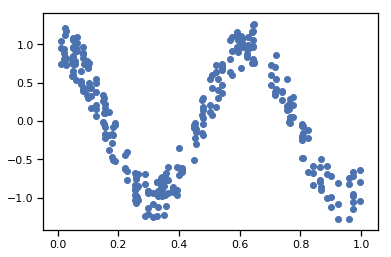

In [14]:
plt.scatter(ff.x, ff.y1)

C:\Users\aamico\AppData\Local\Continuum\anaconda3\envs\deep_mouse\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


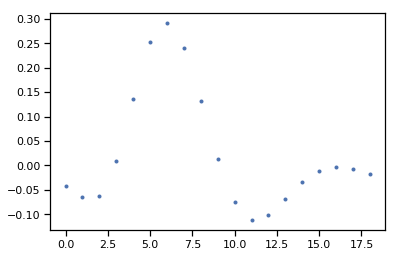

In [15]:
f = fmri[fmri.subject=='s13'][fmri.event=='stim'][fmri.region == 'parietal']
plt.plot(f.timepoint, f.signal, '.')

,pclass,age,sibsp,parch,fare,adult_male,alone
survived,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.55708,-0.203367


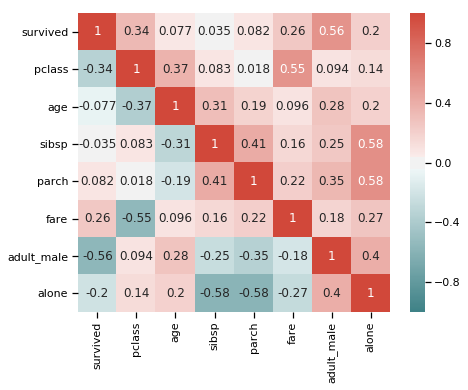

In [112]:
df = sns.load_dataset('titanic')

corr = df.corr()
top_right_triangle = np.triu_indices_from(corr)
corr.values[top_right_triangle] = np.abs(corr.values[top_right_triangle])

fig = plt.figure(figsize=(7, 5.5))
sns.heatmap(corr, annot=True, vmin=-1, vmax=1,
            cmap=sns.diverging_palette(200, 15, as_cmap=True))
corr['survived'].to_frame()[1:].T

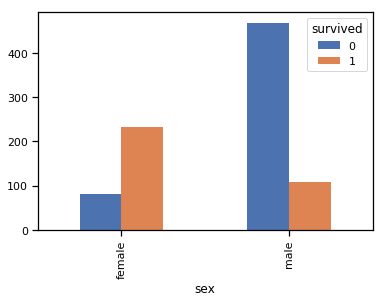

In [64]:
df = sns.load_dataset('titanic')
survived_count = pd.crosstab(index=[df.sex], columns=[df.survived])

fig, ax = plt.subplots(1, figsize=(6,4))
survived_count.plot.bar(stacked=False, ax=ax)

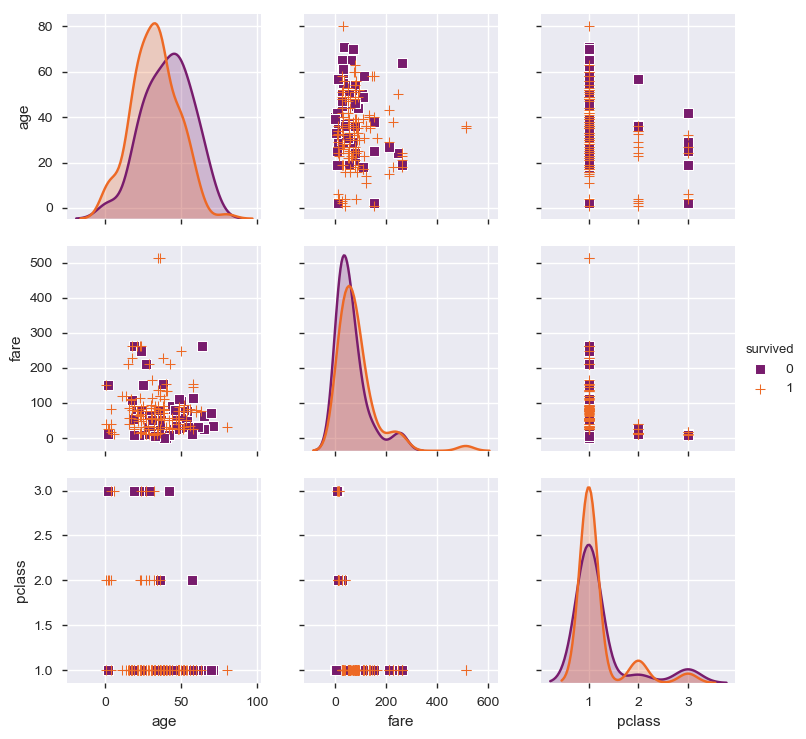

In [274]:
import seaborn as sns

df = sns.load_dataset('titanic')
df = df.dropna()
ax = sns.pairplot(df, vars=['age', 'fare', 'pclass'], hue='survived', palette='inferno',
             kind='scatter', diag_kind='kde', markers=['s', '+'])

# ax.fig.savefig('pairplot.png', bbox_inches='tight', dpi=300)

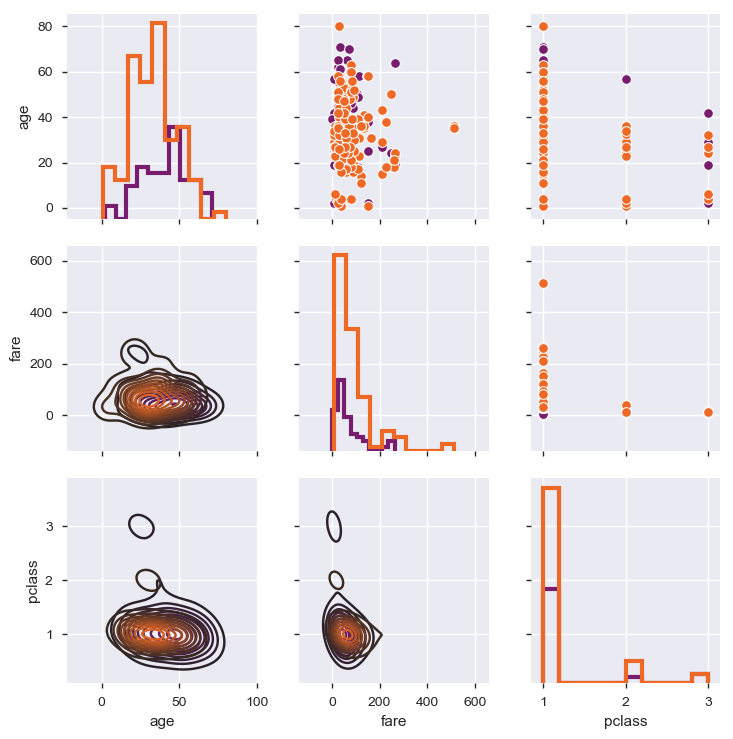

In [276]:
import seaborn as sns

a = []
aa = []

def wrap(*args, **kwargs):    
    a.append(args)
    aa.append(kwargs)

    if len(set(args[0])) > 3:
        sns.kdeplot(*args, **kwargs)
    else:
        plt.hist(*args, **kwargs)


g = sns.PairGrid(df, diag_sharey=False, hue='survived', vars=['age', 'fare', 'pclass'], palette='inferno')
g.map_diag(plt.hist, histtype="step", linewidth=3)
g.map_lower(sns.kdeplot)
g.map_upper(sns.scatterplot)


In [266]:
# from sklearn import preprocessing
# le = preprocessing.LabelEncoder()
# le.fit_transform(a[2][0])

In [223]:
hash('asfasfaf')

387296073331918051

In [257]:
df.select_dtypes('str')

TypeError: string dtypes are not allowed, use 'object' instead